###AA 609 : Computational Methods for Astronomy and Space Sciences

Lab Practical 2\
Due date : January 26, 2022

Assigned By ***: Dr. Bhargav Vaidya***

---



***Avinash Kumar Himanshu***\
``2103121006``


---



##1. Stiff ODEs and Astrochemical Reactions

Consider an element X whose concentration y(t) is evolved with time using the following equation:

$$\frac{dy}{dt} = 5y - 5t^2$$

Assuming its initial concentration
$$ y(0) = 2/25$$

Derive the analytic solution and show that it is a parabola.

Solve the above equation numerically over the time interval 0 ≤ t ≤ 2. Try to solve this problem thrice, getting
an approximately parabolic answer each time. The first time, use the Euler method, second time RK2 and the
third time use the backward Euler method. For each solution attempt, try the values of n = 25, 250, and then
n = 2500, where n is the number of grid points within the time interval.

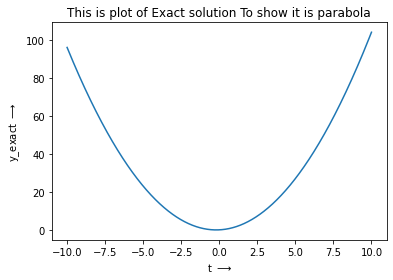

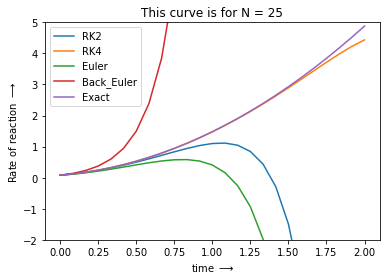

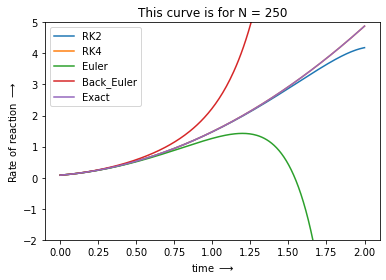

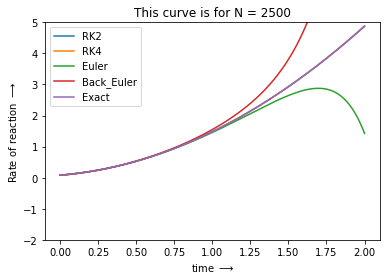

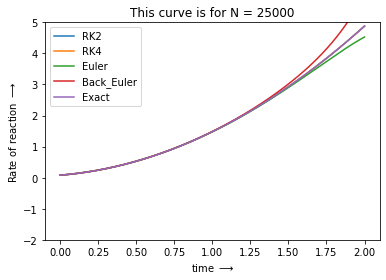

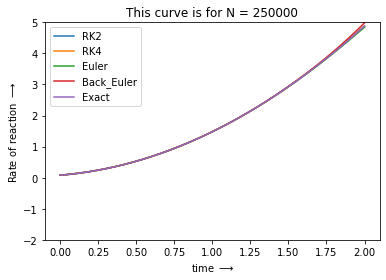

In [ ]:
#importing required libarries
import numpy as np
import matplotlib.pyplot as plt

#defining rate of reaction as given by dy/dt = 5y - 5t^2
def rxn_rate(y, t):
    return (5*y) - (5*t**2)
#defining exact solution so to compare the obtained result
def exact_soln(y, t):
    return t**2 + 2*t/5 + 2/25

#--------------------------------------------------------------------
#Plotting Exact solution to show that it is parabola
t_0 = -10
t_max = 10
t = np.linspace(t_0, t_max, 1000)
dt = t[1] - t[0]
y_exact = exact_soln(0, t)
plt.plot(t, y_exact)
plt.xlabel(r"t $ \longrightarrow $")
plt.ylabel(r"y_exact $ \longrightarrow $")
plt.title("This is plot of Exact solution To show it is parabola")
plt.show()
#--------------------------------------------------------------------

#creating list of grid points so to run through a loop for desired N
n = [25, 250, 2500, 25000, 250000]

#Loop for different values of N extracted from n=[25, 250, 2500, 25000, 250000]
for N in n:
  
    #Redefining t for given domain
    t_0 = 0
    t_max = 2
    t = np.linspace(t_0, t_max, N)
    dt = t[1] - t[0]
    
    # for exact solution
    y_exact = exact_soln(0, t)

    '''creating arrays of lenght N with all element as zero so that later I can 
    store the obtained values of different solutions.'''
    y_euler = np.zeros(N)
    y_euler[0] = 2/25

    y_RK2 = np.zeros(N)
    y_RK2[0] = 2/25

    y_RK4 = np.zeros(N)
    y_RK4[0] = 2/25

    y_back_euler = np.zeros(N)
    y_back_euler[0] = 2/25

    
    #Loop to solve equations
    for i in range(1, N):

        #for Euler's Method
        y_euler[i] = y_euler[i-1] + dt*rxn_rate(y_euler[i-1], t[i-1])
        
        #for Backward Euler Method
        y_back_euler[i] = (y_back_euler[i-1] - 5*dt*t[i-1]**2)/(1 - 5*dt)
        
        #for Runge Kutta 2nd Order
        k1 = dt*rxn_rate(y_RK2[i-1], t[i-1])
        k2 = dt*rxn_rate(y_RK2[i-1]+k1, t[i-1]+dt)
        
        y_RK2[i] = y_RK2[i-1] + (k1+k2)/2
        
        
        #for Runge Kutta 4th Order
        c1 = dt*rxn_rate(y_RK4[i-1], t[i-1])
        c2 = dt*rxn_rate(y_RK4[i-1]+c1/2, t[i-1]+dt/2)
        c3 = dt*rxn_rate(y_RK4[i-1]+c2/2, t[i-1]+dt/2)
        c4 = dt*rxn_rate(y_RK4[i-1]+c3, t[i-1]+dt)
        
        y_RK4[i] = y_RK4[i-1] + 1/6*(c1 + 2*c2 + 2*c3 + c4)

    #plotting all the curve
    plt.plot(t, y_RK2, label = "RK2")
    plt.plot(t, y_RK4, label = "RK4")
    plt.plot(t, y_euler, label= "Euler")     
    plt.plot(t, y_back_euler, label= "Back_Euler")
    plt.plot(t, y_exact, label= "Exact")
    plt.ylim(-5, 6)
    plt.legend()
    plt.title(f'This curve is for N = {N}')
    plt.xlabel(r"time $ \longrightarrow $")
    plt.ylabel(r"Rate of reaction $ \longrightarrow $")
    plt.ylim(-2, 5)
    plt.show()

##2. Classic 1D Advection Equation

Consider a 1D domain with x as the spatial co-ordinate that ranges from -10.0 to 10.0 and discretized into 200
points. At an initial time t = 0, consider a normalized gaussian pulse that is centered at x = 0 with σ = 1.0
given as:
$$   u(x,t=0)=\frac{1}{\sigma \sqrt{2\pi}}\exp\left(-\dfrac{x^2}{2\sigma ^2}\right)  $$


\\

*   Develop a 1D advection solver to solve the following equation
$$\frac{\partial u}{\partial t} + \lambda \frac{\partial u}{\partial x} = 0$$
upto a maximum time t = 25 using the following schemes - a) FTCS, b) Upwind, c) Lax Method, d)
MacCormack method and e) Lax-Wendroff Scheme
For each scheme adopt values of λ = 3.0, -3.0, 10.0. Also adopt a periodic boundary condition for all cases
and ∆t=10^−3 Explain in each case how does the solution behave from its expected value.



*   Vary the choosen time steps for the Lax-Wendroff scheme ∆t = 10^-1, 10^−2, 10^−4 and check if the solution remains stable based on your inference discuss about the r condition.



*   Repeat the above exercise only using MacCormack Method for a rectangular wave pulse of height 2.0 and
width 1.0 and centered at x = 0 at time t = 0 and in the same spatial domain. Explain the features that
you observe in your solutions, do they appear physically correct?





*Solution:*



\
\
`Advecting the given u(x, t=0) `

In [ ]:
#importing required libarries
%matplotlib notebook
%pylab inline


#Creating Mesh of 200 grid points
Nx = 200
x_min , x_max = (-10, 10)
x = np.linspace(x_min, x_max, Nx)
dx = (x_max - x_min)/(Nx-1)

#Defining time for advection
t_min, t_max = (0, 25)
dt = 0.0001 #choose dt out of [0.01, 0.001, 0.0001]
Nt = int((t_max - t_min)/dt)
t = np.linspace(t_min, t_max, Nt+1)

#Constants
sigma = 1
lamb = 10  #choose lambda from [-3, 3, 10]
r = lamb*dt/dx

#creating 2D array to store value of function at each point in space and time 
u_ftcs = np.zeros((Nt+1, Nx))
u_upwind = np.zeros((Nt+1, Nx))
u_lax = np.zeros((Nt+1, Nx))
u_lax_wen = np.zeros((Nt+1, Nx))
u_mccW = np.zeros((Nt+1, Nx))
u_exact = np.zeros((Nt+1, Nx))


#definition of function "u"
def u(x, t):
  return (1/(sigma*np.sqrt(2*np.pi)))*np.exp((-x**2)/2*sigma**2)


#Initial Condition
u_ftcs[0, : ] = u(x, 0)
u_upwind[0, : ] = u(x, 0)
u_lax[0, : ] = u(x, 0)
u_lax_wen[0, : ] = u(x, 0)
u_mccW[0, : ] = u(x, 0)

#-------------------------------------------------------------------------------
#Temporal Loop
for n in range(0, Nt):


  #Spatial loops

  # Solve equation using the FTCS scheme
  for i in range(1, Nx-1):
    u_ftcs[n+1, i] = u_ftcs[n, i] - 0.5*r*(u_ftcs[n, i+1] - u_ftcs[n, i-1])
  u_ftcs[n+1, 0] = u_ftcs[n, 0] - 0.5*r*(u_ftcs[n, 1] - u_ftcs[n, Nx - 1])
  u_ftcs[n+1, Nx-1] = u_ftcs[n, Nx-1] - 0.5*r*(u_ftcs[n, 0] - u_ftcs[n, Nx-2])
  #-----------------------------------------------------------------------------

  # Solve equation using the Upwind scheme
  if (lamb>0.):
    for i in range (1,Nx):
      u_upwind[n+1, i] = u_upwind[n, i] - r*(u_upwind[n, i]-u_upwind[n, i-1]);
    u_upwind[n+1, 0] = u_upwind[n, 0] - r*(u_upwind[n, 0] - u_upwind[n, Nx-1])
  
  else:
    for i in range (0,Nx-1):
      u_upwind[n+1, i] = u_upwind[n, i] - r*(u_upwind[n, i+1]-u_upwind[n, i]);

    #Boundary Condition
    u_upwind[n+1, Nx-1] = u_upwind[n, Nx-1] - r*(u_upwind[n, 0] - u_upwind[n, Nx-1])  
  #-----------------------------------------------------------------------------

  # Solve equation using the Lax Method scheme
  for i in range(1, Nx-1):
    u_lax[n+1, i] = 0.5*(u_lax[n, i+1] + u_lax[n, i-1]) - 0.5*r*(u_lax[n, i+1] - u_lax[n, i-1])

  #Boundary Conditions
  u_lax[n+1, 0] = 0.5*(u_lax[n, 1] + u_lax[n, Nx-1]) - 0.5*r*(u_lax[n, 1] - u_lax[n, Nx-1])
  u_lax[n+1, Nx-1] = 0.5*(u_lax[n, 0] + u_lax[n, Nx-2]) - 0.5*r*(u_lax[n, 0] - u_lax[n, Nx-2])
  #-----------------------------------------------------------------------------

  #Solving Equation Using Lax Wendroff scheme
  for i in range(1, Nx-1):
    ulw1 = 0.5*(u_lax_wen[n, i] + u_lax_wen[n, i-1]) - 0.5*r*(u_lax_wen[n, i] - u_lax_wen[n, i-1])
    ulw2 = 0.5*(u_lax_wen[n, i] + u_lax_wen[n, i+1]) - 0.5*r*(u_lax_wen[n, i+1] - u_lax_wen[n, i])
    u_lax_wen[n+1, i] = u_lax_wen[n, i] + r*(ulw1 - ulw2)

  #boundary conditions
  klw1 = 0.5*(u_lax_wen[n, 0] + u_lax_wen[n, Nx-1]) - 0.5*r*(u_lax_wen[n, 0] - u_lax_wen[n, Nx-1])
  klw2 = 0.5*(u_lax_wen[n, 0] + u_lax_wen[n, 1]) - 0.5*r*(u_lax_wen[n, 1] - u_lax_wen[n, 0])
  u_lax_wen[n+1, 0] = u_lax_wen[n, 0] + r*(klw1 - klw2)

  clw1 = 0.5*(u_lax_wen[n, Nx-1] + u_lax_wen[n, Nx-2]) - 0.5*r*(u_lax_wen[n, Nx-1] - u_lax_wen[n, Nx-2])
  clw2 = 0.5*(u_lax_wen[n, Nx-1] + u_lax_wen[n, 0]) - 0.5*r*(u_lax_wen[n, 0] - u_lax_wen[n, Nx-1])
  u_lax_wen[n+1, Nx-1] = u_lax_wen[n, Nx-1] + r*(clw1 - clw2)
  #-----------------------------------------------------------------------------

  #Solving Equation using MacCormack method
  for i in range(1, Nx-1):
    umcc1 = u_mccW[n, i] - r*(u_mccW[n, i+1] - u_mccW[n, i])
    umcc2 = u_mccW[n, i-1] - r*(u_mccW[n, i] - u_mccW[n, i-1])
    u_mccW[n+1, i] = (u_mccW[n, i] + umcc1)/2 - 0.5*r*(umcc1 - umcc2)

  #Boundary Conditions
  kmcc1 = u_mccW[n, 0] - r*(u_mccW[n, 1] - u_mccW[n, 0])
  kmcc2 = u_mccW[n, Nx-1] - r*(u_mccW[n, 0] - u_mccW[n, Nx-1])
  u_mccW[n+1, 0] = (u_mccW[n, 0] + kmcc1)/2 - 0.5*r*(kmcc1 - kmcc2) 

  cmcc1 = u_mccW[n, Nx-1] - r*(u_mccW[n, 0] - u_mccW[n, Nx-1])
  cmcc2 = u_mccW[n, Nx-2] - r*(u_mccW[n, Nx-1] - u_mccW[n, Nx-2])
  u_mccW[n+1, Nx-1] = (u_mccW[n, Nx-1] + cmcc1)/2 - 0.5*r*(cmcc1 - cmcc2) 
  #-----------------------------------------------------------------------------

  #solving for Exact Solution
  d = lamb*n*dt
  u_exact[n, :] = u((np.mod(x - d - x_min, (x_max - x_min))+x_min), 0)
#-------------------------------------------------------------------------------

  #ploting the signals
  if n % 10000 == 0: 
    plt.plot(x, u_ftcs[n], label = "FTCS")
    plt.plot(x, u_upwind[n], label = "upwind")
    plt.plot(x, u_lax[n], label = "Lax")
    plt.plot(x, u_lax_wen[n],"-.", label = "Lax Wendroff")
    plt.plot(x, u_mccW[n],":", label = "MacCormack")
    plt.plot(x, u_exact[n], "k--", label = "Exact")
    plt.title(f'At time t = {t[n]} for $\lambda$ = {lamb} and $\Delta$t = {dt}')
    plt.legend()
    plt.show()



From these plots for different lambda and dt we can say that:

Lax wendroff and MacCormack behave in very similar fashion for same lambda and dt. also for lamda = 10 decreasing the dt after certain value has adverse effect on lax wendroff and MacCormack method as well as on upwind method.

While FTCS seems to behave better when dt is decreased 

`Advecting square Pulse With Upwind Method As well as MacCormack Method`

In [ ]:
#Importing Required libraries
import numpy as np
import matplotlib.pyplot as plt

#Defining Temporal domain
t_min, t_max = (0, 25)
dt = 0.001
Nt = int((t_max - t_min)/dt)
t = np.linspace(t_min, t_max, Nt+1)

#definig spatial domain
Nx = 200
x_min , x_max = (-10, 10)
x = np.linspace(x_min, x_max, Nx)
dx = (x_max - x_min)/(Nx-1)

lamb = 3.0            #one of the value out of [-3, 3, 10]
r = lamb*dt/dx

y = np.zeros(Nx)


#defining square pulse
for i in range(Nx):
  if -0.499 < x[i] < 0.501:
    y[i] = 2
  else:
    y[i]=0

#array to store pulse at each point in spacetime
u_upwind = np.zeros((Nt+1, Nx))
u_upwind[0, : ] = y

u_McCW = np.zeros((Nt+1, Nx))
u_McCW[0,:] = y

#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------
#temporal loop
for n in range(0, Nt):

  #spatial loop

  #Solving Equation using Upwind method
  if (lamb>0.):
    for i in range (1,Nx):
      u_upwind[n+1, i] = u_upwind[n, i] - r*(u_upwind[n, i]-u_upwind[n, i-1])
    
    #Boundary Conditions
    u_upwind[n+1, 0] = u_upwind[n, 0] - r*(u_upwind[n, 0] - u_upwind[n, Nx-1])

  else:
    for i in range (0,Nx-1):
      u_upwind[n+1, i] = u_upwind[n, i] - r*(u_upwind[n, i+1]-u_upwind[n, i])

    #Boundary Conditions
    u_upwind[n+1, Nx-1] = u_upwind[n, Nx-1] - r*(u_upwind[n, 0] - u_upwind[n, Nx-1])  
  #-----------------------------------------------------------------------------

  #Solving Equation using MacCormack method
  for i in range(1, Nx-1):
    u1 = u_McCW[n, i] - r*(u_McCW[n, i+1] - u_McCW[n, i])
    u2 = u_McCW[n, i-1] - r*(u_McCW[n, i] - u_McCW[n, i-1])
    u_McCW[n+1, i] = (u_McCW[n, i] + u1)/2 - 0.5*r*(u1 - u2)

  #Boundary Conditions
  k1 = u_McCW[n, 0] - r*(u_McCW[n, 1] - u_McCW[n, 0])
  k2 = u_McCW[n, Nx-1] - r*(u_McCW[n, 0] - u_McCW[n, Nx-1])
  u_McCW[n+1, 0] = (u_McCW[n, 0] + k1)/2 - 0.5*r*(k1 - k2) 

  c1 = u_McCW[n, Nx-1] - r*(u_McCW[n, 0] - u_McCW[n, Nx-1])
  c2 = u_McCW[n, Nx-2] - r*(u_McCW[n, Nx-2] - u_McCW[n, Nx-2])
  u_McCW[n+1, Nx-1] = (u_McCW[n, Nx-1] + c1)/2 - 0.5*r*(c1 - c2)
#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------

  #ploting the signals
  if n % 100 == 0:
    plt.plot(x, u_McCW[n], label="MacCormac Method")
    plt.plot(x, u_upwind[n], label = "Upwind Method")
    plt.title(f'At time t = {t[n]}')
    plt.legend()
    plt.show()


from plot we can visualise that as we try to advect square pulse it get deformed too fast. Squre pulse represent shock on both face

also  the sharp kink observed is due to Gibbs Phenomena. It might be noted that Upwind method chnges square pulse to almost gaussian. This is because upwind method smoothen the shock and decreases its amplitude. 